In [29]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv("../dataset/kidney_disease.csv")

In [31]:
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [32]:
df['rbc'] = df['rbc'].map({'abnormal':1,'normal':0})
df['pc'] = df['pc'].map({'abnormal':1,'normal':0})
df['pcc'] = df['pcc'].map({'present':1,'notpresent':0})
df['ba'] = df['ba'].map({'present':1,'notpresent':0})
df['pe'] = df['pe'].map({'yes':1,'no':0})
df['classification'] = df['classification'].map({'ckd':1,'notckd':0 , 'ckd\t':1})
df['htn'] = df['htn'].map({'yes':1,'no':0})
df['dm'] = df['dm'].map({'yes':1,'no':0})
df['cad'] = df['cad'].map({'yes':1,'no':0})
df['appet'] = df['appet'].map({'good':1,'poor':0})
df['ane'] = df['ane'].map({'yes':1,'no':0})

In [33]:
n_cols = {'bp':'Blood_Pressure',
            'sg':  'Specific_Gravity','al': 'Albumin','su' : 'Sugar','bgr': 'Blood_Glucose_Random','bu' : 'Blood_Urea' ,
            'sc' : 'Serum_Creatinine','sod' : 'Sodium','pot' : 'Potassium','hemo' : 'Hemoglobin',
            'rbc' : 'Red_Blood_Cells','pc' : 'Pus_Cell','pcc' : 'Pus_Cell_Clumps','ba' : 'Bacteria','htn' : 'Hypertension', 
            'dm' : 'Diabetes_Mellitus','cad' : 'Coronary_Artery_Disease','appet' : 'Appetite','pe' : 'Pedal_Edema',
            'ane' : 'Anemia','classification' : 'Target'}

df.rename(columns=n_cols ,inplace=True)

In [34]:
df.head()

,id,age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,...,pcv,wc,rc,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [36]:
df = df.drop(["pcv","wc","rc","id"], axis = 1) 

In [37]:
df.isnull().sum()

age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Hypertension                 2
Diabetes_Mellitus            8
Coronary_Artery_Disease      4
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Target                       0
dtype: int64

In [38]:
df['age'] = df['age'].fillna(df['age'].mean())

In [39]:
df = df.fillna(df.median())

In [40]:
from sklearn.model_selection import train_test_split


X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\Dhruva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhruva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


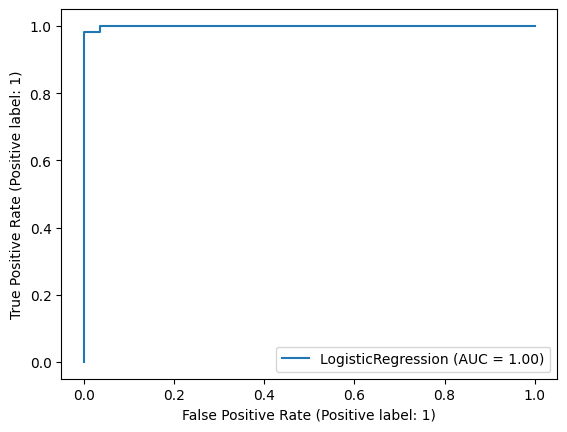

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve


model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

pred
plot_roc_curve(model, X_test, y_test)

c:\Users\Dhruva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


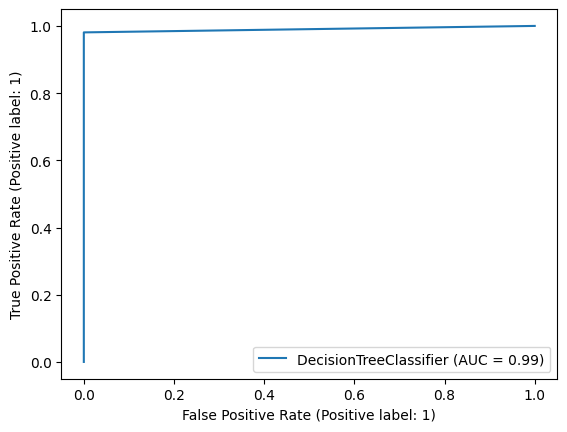

In [44]:
from sklearn.tree import DecisionTreeClassifier


modelD = DecisionTreeClassifier(criterion='entropy')
modelD.fit(X_train, y_train)
predD = modelD.predict(X_test)
predD

plot_roc_curve(modelD, X_test, y_test)

c:\Users\Dhruva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


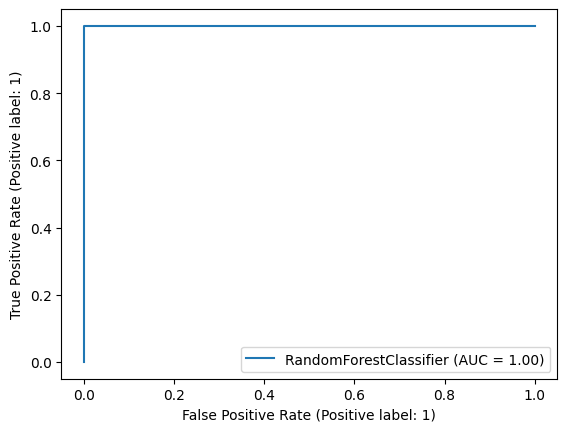

In [46]:
from sklearn.ensemble import RandomForestClassifier


modelR = RandomForestClassifier(n_estimators=100, criterion='gini')
modelR.fit(X_train,y_train)
predR = modelR.predict(X_test)
predR

plot_roc_curve(modelR, X_test,y_test)

In [47]:
import pickle

In [48]:
fname = 'kidney-model.sav'
pickle.dump(modelR, open(fname, 'wb'))
loaded = pickle.load(open('kidney-model.sav', 'rb'))